In [16]:
from pymongo import MongoClient
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Connect to MongoDB
client = MongoClient('mongodb://localhost:27017/')
db = client["lab1"]
collection = db["tokens"]

# Retrieve data from MongoDB
data = [article['tokens'] for article in collection.find()]

# Apply one hot encoding
cv = CountVectorizer(binary=True)
one_hot_encoded = cv.fit_transform(data)

# Apply bag of words
cv = CountVectorizer()
bag_of_words = cv.fit_transform(data)

# Apply TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data)

# Print the shapes of the matrices
print("One Hot Encoded shape:", one_hot_encoded)
print("Bag of Words shape:", bag_of_words)
print("TF-IDF shape:", tfidf_matrix)


One Hot Encoded shape:   (0, 289)	1
  (0, 184)	1
  (0, 96)	1
  (0, 56)	1
  (0, 226)	1
  (0, 251)	1
  (0, 234)	1
  (0, 212)	1
  (0, 81)	1
  (0, 329)	1
  (0, 125)	1
  (0, 101)	1
  (0, 2)	1
  (0, 39)	1
  (0, 238)	1
  (0, 241)	1
  (0, 250)	1
  (0, 264)	1
  (0, 326)	1
  (0, 107)	1
  (0, 334)	1
  (0, 85)	1
  (1, 56)	1
  (1, 226)	1
  (1, 234)	1
  :	:
  (138, 188)	1
  (138, 269)	1
  (138, 340)	1
  (138, 137)	1
  (138, 157)	1
  (138, 200)	1
  (138, 291)	1
  (139, 125)	1
  (139, 39)	1
  (139, 241)	1
  (139, 43)	1
  (139, 143)	1
  (139, 46)	1
  (139, 104)	1
  (139, 332)	1
  (139, 185)	1
  (139, 6)	1
  (139, 221)	1
  (139, 4)	1
  (139, 205)	1
  (139, 199)	1
  (139, 28)	1
  (139, 272)	1
  (139, 128)	1
  (139, 135)	1
Bag of Words shape:   (0, 289)	1
  (0, 184)	1
  (0, 96)	1
  (0, 56)	1
  (0, 226)	1
  (0, 251)	1
  (0, 234)	1
  (0, 212)	1
  (0, 81)	1
  (0, 329)	1
  (0, 125)	1
  (0, 101)	1
  (0, 2)	1
  (0, 39)	1
  (0, 238)	1
  (0, 241)	1
  (0, 250)	1
  (0, 264)	1
  (0, 326)	1
  (0, 107)	1
  (0, 334)	1


In [17]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Tokenize the data
tokenized_data = [word_tokenize(article) for article in data]

# Apply Skip Gram
skipgram_model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, sg=1)

# Apply CBOW
cbow_model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, sg=0)

word = 'غزة'
print("Word Vector for '{}' (Skip Gram):\n".format(word), skipgram_model.wv[word])
print("Word Vector for '{}' (CBOW):\n".format(word), cbow_model.wv[word])



Word Vector for 'غزة' (Skip Gram):
 [-0.07798181  0.12938693  0.06594058  0.06614815  0.03943171 -0.19016482
  0.17453602  0.2791015  -0.08995366 -0.04998205 -0.06220797 -0.1465445
 -0.03729199  0.01168888 -0.05747877 -0.10752377  0.04027731 -0.14739652
 -0.07803086 -0.2707618  -0.02417034  0.02076571  0.05844388 -0.08994578
 -0.07080556  0.06982593 -0.02764714 -0.16636561 -0.1545008  -0.03190444
  0.15646993  0.05527054 -0.02622614  0.02625811 -0.10877458  0.16248071
  0.0783325  -0.1428693  -0.1251496  -0.25280574  0.06205977 -0.20677614
 -0.02070479  0.05816941  0.24186914  0.03341392 -0.05151759 -0.08980318
  0.03943578  0.0202107   0.17227234 -0.07086798  0.07693421  0.02834154
 -0.20209168  0.12515834  0.02016791  0.04915464 -0.21465111  0.10663226
  0.01845795  0.05615082  0.10026982 -0.1598153  -0.22045295 -0.00070039
  0.14155324  0.12325991 -0.21329157  0.13542381 -0.12629686  0.00481963
  0.12152814 -0.03004334  0.11935826  0.17049326  0.04781061  0.01652142
 -0.19693695  0.

In [18]:
from gensim.models import FastText

# Apply Glove
glove_model = FastText(sentences=tokenized_data, vector_size=100, window=5, sg=1)

# Apply FastText
fasttext_model = FastText(sentences=tokenized_data, vector_size=100, window=5, sg=0)

# Example of accessing word vectors
print("Word Vector for '{}' (GloVe):\n".format(word), glove_model.wv[word])
print("Word Vector for '{}' (FastText):\n".format(word), fasttext_model.wv[word])


Word Vector for 'غزة' (GloVe):
 [ 0.02634837  0.2504114   0.24263875  0.11282531 -0.14889063 -0.0047032
  0.19389412  0.19204848 -0.16576374  0.06818532 -0.1860428  -0.07566767
  0.01870499  0.02127762  0.04763081 -0.10404766 -0.11101421 -0.02259524
  0.01531711 -0.16371596 -0.20275447 -0.04154651 -0.05477999  0.12530625
 -0.05148267 -0.06405257  0.1301698   0.13271847 -0.11186215  0.01671183
  0.20383279  0.16910844 -0.0443664  -0.0810923   0.020127    0.12885542
 -0.00637055 -0.09042631 -0.10642283  0.0380067   0.06897444  0.08035218
  0.00949339  0.07926653  0.043791    0.06689341 -0.10789902 -0.08679494
  0.11264902  0.03968519 -0.06652747 -0.2366582  -0.04929056 -0.07468068
  0.29139826  0.1331347   0.19209993 -0.167071   -0.07182722  0.13412471
  0.0325054   0.1035798   0.31621656  0.10825841  0.0064097   0.08564643
  0.06449033  0.02589566  0.00631345 -0.15464161 -0.15868701  0.04200379
  0.23344485 -0.15683289 -0.00901003  0.08834952  0.07025394  0.04273399
  0.01210766 -0.0073

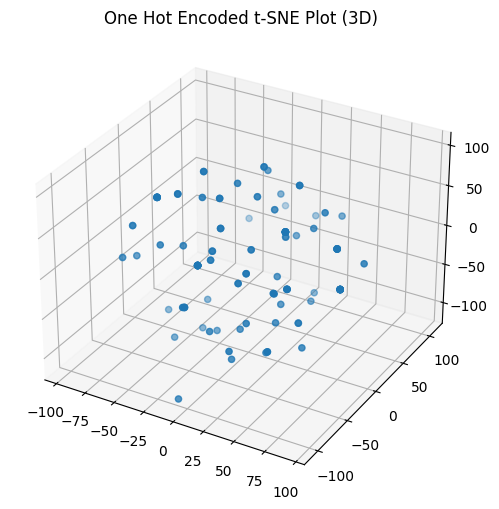

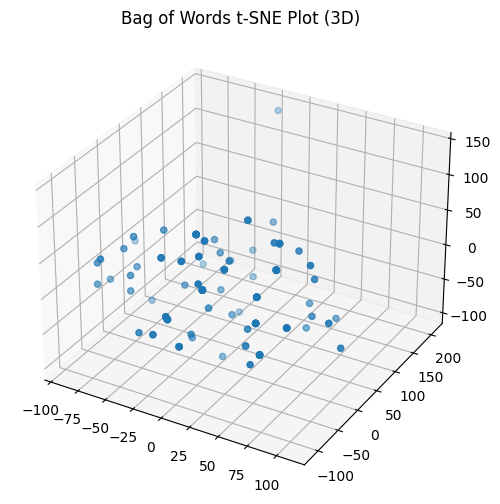

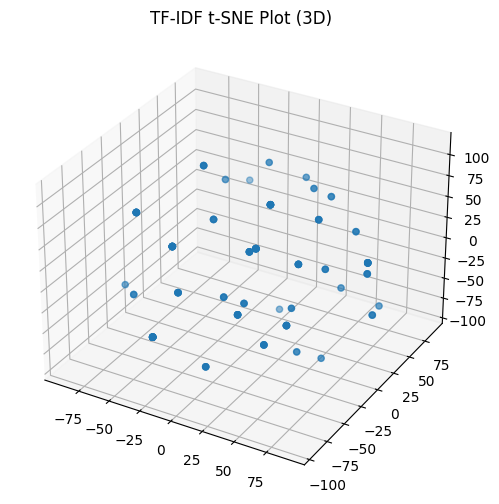

General Conclusion:
Word embedding techniques like Word2Vec, GloVe, and FastText capture semantic relationships between words, making them suitable for NLP tasks.
TF-IDF is useful for representing the importance of words in a document.
Bag of Words and one hot encoding are simpler techniques that do not consider word order but can be effective in certain contexts.


In [19]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Function to plot vectors using t-SNE in 3D
def plot_vectors_3d(vectors, model_name):
    tsne = TSNE(n_components=3, random_state=0)
    vectors_tsne = tsne.fit_transform(vectors)
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1], vectors_tsne[:, 2])
    ax.set_title(f'{model_name} t-SNE Plot (3D)')
    plt.show()


plot_vectors_3d(one_hot_encoded.toarray(), 'One Hot Encoded')
plot_vectors_3d(bag_of_words.toarray(), 'Bag of Words')
plot_vectors_3d(tfidf_matrix.toarray(), 'TF-IDF')




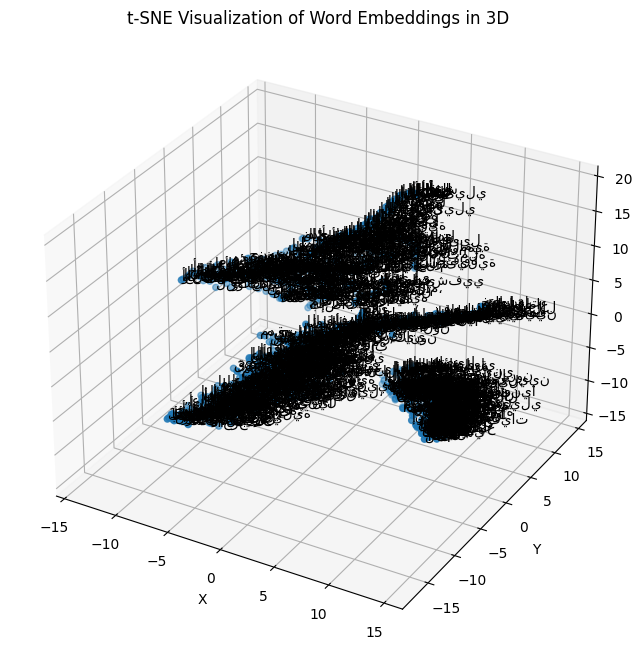

In [20]:
from mpl_toolkits.mplot3d import Axes3D

# Apply t-SNE with 3 components for 3D visualization
tsne_3d = TSNE(n_components=3, random_state=42)
vectors_tsne_3d = tsne_3d.fit_transform(all_vectors_array)

# Plot the vectors in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(vectors_tsne_3d[:, 0], vectors_tsne_3d[:, 1], vectors_tsne_3d[:, 2])
for i, word in enumerate(all_words):
    ax.text(vectors_tsne_3d[i, 0], vectors_tsne_3d[i, 1], vectors_tsne_3d[i, 2], word, color='black')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('t-SNE Visualization of Word Embeddings in 3D')
plt.show()
